# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [ ]:
data = pd.read_excel('/Users/aghi/Documents/Work/april/data science project /AXF-1 data update 26APR25.xlsx')

In [3]:
data.head()

,Column 1,Date of experiment,Aims & Hypothesis,Core used,Core Formulation,Core Viscosity (cP),UV used,UV formulation,UV viscosity (cP),Emulsion viscosity (cP),...,Droplet/particle size (µm),Droplet/particle size range,Droplet/particle size range STDEV,% single core,% empty,Polydispersity Index,% dry after 24h in incubator,% dry after 2 days 70% humidity,Transmission window,Notes
0,AXF0020,2024-07-24,Baseline run,BNC00017,OG (66/27/7),4560.0,BNU00015,AUF69,228.0,476.4,...,43.1,6.5-116.6,20.4,23.80,0.08,0.224030,NaN,NaN,0.03650,NaN
1,AXF0021,2024-07-30,Does removing PEDGA from UV remove the 'wickin...,BNC00022,OG (66/27/7),6180.0,BNU00016,AUF85,260.0,598.8,...,53.3,9.1-136.6,22.5,5.85,0.02,0.178201,0.95,NaN,0.01780,NaN
2,AXF0022,2024-08-02,"Repeat of AXF0021, at smaller scale to create ...",BNC00017,OG (66/27/7),6852.0,BNU00017,AUF85,262.8,598.8,...,45.9,10.5-114.7,19.1,25.50,0.04,0.173158,0.95,NaN,0.03410,NaN
3,AXF0023,2024-08-09,Size screen as a function of dispersed flow rate,BNC00017,OG (66/27/7),6756.0,BNU00018,AUF85,247.2,594.0,...,59.6,18.9-126.5,21.2,23.50,0.00,0.126526,0.80,NaN,0.04165,No nail lamp in cure rig. UV tube lights only
4,AXF0024,2024-08-09,Size screen as a function of dispersed flow rate,BNC00017,OG (66/27/7),6756.0,BNU00018,AUF85,247.2,594.0,...,51.6,24.6-108.8,11.9,47.20,0.00,0.053186,0.60,NaN,0.02100,No nail lamp in cure rig. UV tube lights only


In [4]:
data.columns

Index(['Column 1', 'Date of experiment', 'Aims & Hypothesis', 'Core used',
       'Core Formulation', 'Core Viscosity (cP)', 'UV used', 'UV formulation',
       'UV viscosity (cP)', 'Emulsion viscosity (cP)',
       'Vessel, impellor and spin speed', 'Outer used', 'Outer viscosity (cP)',
       'Dispersed Flow Rate (mL/min)', 'Continuous Flow Rate (mL/min)',
       'Flow Rate Ratio', 'Cure Rig Used', 'Length of curing tubing (m)',
       'UV Power (J s-1)', 'Curing Energy (kJ g-1)',
       'Droplet/particle size (µm)', 'Droplet/particle size range',
       'Droplet/particle size range STDEV', '% single core', '% empty',
       'Polydispersity Index', '% dry after 24h in incubator',
       '% dry after 2 days 70% humidity', 'Transmission window', 'Notes'],
      dtype='object')

In [5]:
data.shape

(202, 30)

# Data Pre-processing

In [6]:
null_values = data.isna().sum()
print(null_values)

Column 1                               0
Date of experiment                     0
Aims & Hypothesis                      1
Core used                              0
Core Formulation                       0
Core Viscosity (cP)                    9
UV used                                0
UV formulation                         0
UV viscosity (cP)                      5
Emulsion viscosity (cP)                9
Vessel, impellor and spin speed        0
Outer used                             0
Outer viscosity (cP)                   2
Dispersed Flow Rate (mL/min)           0
Continuous Flow Rate (mL/min)          0
Flow Rate Ratio                        0
Cure Rig Used                          0
Length of curing tubing (m)            0
UV Power (J s-1)                       1
Curing Energy (kJ g-1)                 1
Droplet/particle size (µm)           111
Droplet/particle size range          114
Droplet/particle size range STDEV    145
% single core                        131
% empty         

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Column 1                           202 non-null    object        
 1   Date of experiment                 202 non-null    datetime64[ns]
 2   Aims & Hypothesis                  201 non-null    object        
 3   Core used                          202 non-null    object        
 4   Core Formulation                   202 non-null    object        
 5   Core Viscosity (cP)                193 non-null    float64       
 6   UV used                            202 non-null    object        
 7   UV formulation                     202 non-null    object        
 8   UV viscosity (cP)                  197 non-null    float64       
 9   Emulsion viscosity (cP)            193 non-null    float64       
 10  Vessel, impellor and spin speed    202

In [8]:
# Fill missing values in 'Aims & Hypothesis' with 0 as per request
data['Aims & Hypothesis'] = data['Aims & Hypothesis'].fillna(0)

# Fill missing values for other columns with appropriate methods
# Numeric columns: Fill with median for better handling of outliers
data['Core Viscosity (cP)'] = data['Core Viscosity (cP)'].fillna(data['Core Viscosity (cP)'].median())
data['UV viscosity (cP)'] = data['UV viscosity (cP)'].fillna(data['UV viscosity (cP)'].median())
data['Emulsion viscosity (cP)'] = data['Emulsion viscosity (cP)'].fillna(data['Emulsion viscosity (cP)'].median())
data['Outer viscosity (cP)'] = data['Outer viscosity (cP)'].fillna(data['Outer viscosity (cP)'].median())
data['UV Power (J s-1)'] = data['UV Power (J s-1)'].fillna(data['UV Power (J s-1)'].median())
data['Curing Energy (kJ g-1)'] = data['Curing Energy (kJ g-1)'].fillna(data['Curing Energy (kJ g-1)'].median())
data['Droplet/particle size (µm)'] = data['Droplet/particle size (µm)'].fillna(data['Droplet/particle size (µm)'].median())

# Categorical columns (fill with mode)
data['Droplet/particle size range'] = data['Droplet/particle size range'].fillna(data['Droplet/particle size range'].mode()[0])

# Other numeric columns with more missing values, use median
data['Droplet/particle size range STDEV'] = data['Droplet/particle size range STDEV'].fillna(data['Droplet/particle size range STDEV'].median())
data['% single core'] = data['% single core'].fillna(data['% single core'].median())
data['% empty'] = data['% empty'].fillna(data['% empty'].median())
data['Polydispersity Index'] = data['Polydispersity Index'].fillna(data['Polydispersity Index'].median())
data['% dry after 24h in incubator'] = data['% dry after 24h in incubator'].fillna(data['% dry after 24h in incubator'].median())
data['% dry after 2 days 70% humidity'] = data['% dry after 2 days 70% humidity'].fillna(data['% dry after 2 days 70% humidity'].median())
data['Transmission window'] = data['Transmission window'].fillna(data['Transmission window'].median())

# Notes column - fill with mode (if text is involved)
data['Notes'] = data['Notes'].fillna(data['Notes'].mode()[0])

# After filling, let's check if there are still any missing values
print(data.isnull().sum())

Column 1                             0
Date of experiment                   0
Aims & Hypothesis                    0
Core used                            0
Core Formulation                     0
Core Viscosity (cP)                  0
UV used                              0
UV formulation                       0
UV viscosity (cP)                    0
Emulsion viscosity (cP)              0
Vessel, impellor and spin speed      0
Outer used                           0
Outer viscosity (cP)                 0
Dispersed Flow Rate (mL/min)         0
Continuous Flow Rate (mL/min)        0
Flow Rate Ratio                      0
Cure Rig Used                        0
Length of curing tubing (m)          0
UV Power (J s-1)                     0
Curing Energy (kJ g-1)               0
Droplet/particle size (µm)           0
Droplet/particle size range          0
Droplet/particle size range STDEV    0
% single core                        0
% empty                              0
Polydispersity Index     

In [12]:
# Check for duplicate values
duplicates = data.duplicated().sum()

# Display the rows with duplicate values
print("Duplicate values in dataset: ",duplicates)


Duplicate values in dataset:  0


# EDA

Droplet/Particle Size (µm) (Column 20): This is the size of the final particle. It's a key metric you are likely trying to control or predict, as uniform particle sizes are usually desirable.

Droplet/Particle Size Range (Column 21): The spread or variability in the particle sizes. You want this to be narrow, which would indicate uniform particle size distribution.

Polydispersity Index (PDI) (Column 25): A measure of the distribution of particle sizes. Lower values (0.1-0.2) indicate more uniform particles, which is desirable for consistency.

% Single Core (Column 23): The percentage of particles with a single core. A higher percentage of single-core particles is desirable for uniformity.

% Empty (Column 24): The percentage of particles that are empty (i.e., have no core). Lower values are desirable since empty particles are not functional.

% Dry After 24h in Incubator (Column 26): This indicates the moisture content of the particles after 24 hours. A lower percentage of moisture is typically preferred for better durability.

% Dry After 2 Days at 70% Humidity (Column 27): This indicates the moisture content after two days of exposure to a specific humidity level.

Transmission Window (Column 28): The ability of the particle to transmit light. A higher transmission window means better performance, particularly for optical properties like reflection or color change.

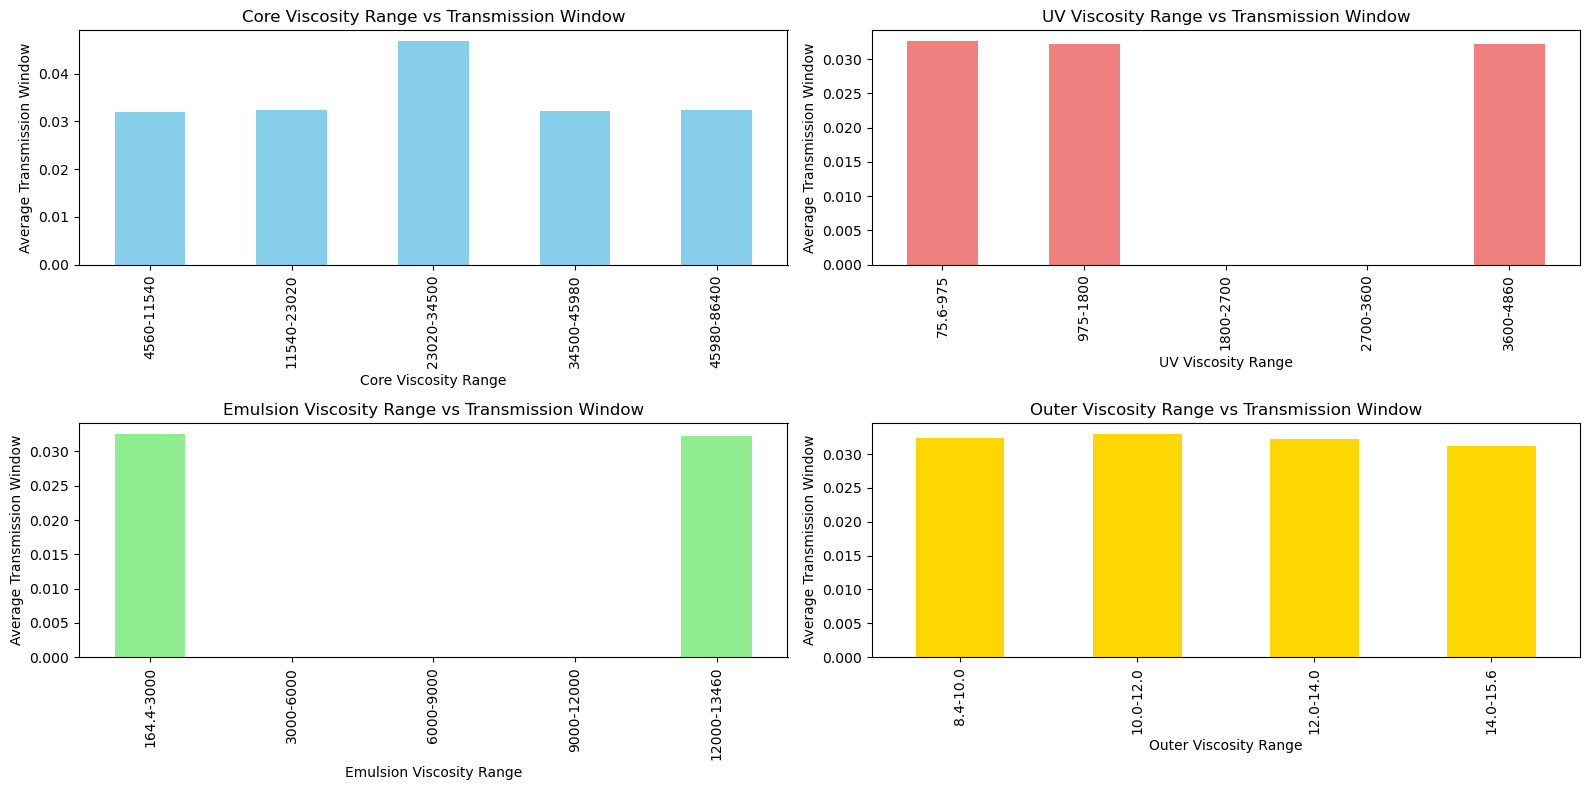

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is the DataFrame that contains your data

# Define the bin ranges for Core, UV, Emulsion, and Outer Viscosity
core_viscosity_bins = [4560, 11540, 23020, 34500, 45980, 86400]  # Example bin edges for Core Viscosity
uv_viscosity_bins = [75.6, 975, 1800, 2700, 3600, 4860]  # Example bin edges for UV Viscosity
emulsion_viscosity_bins = [164.4, 3000, 6000, 9000, 12000, 13460]  # Example bin edges for Emulsion Viscosity
outer_viscosity_bins = [8.4, 10.0, 12.0, 14.0, 15.6]  # Example bin edges for Outer Viscosity

# Create bin labels
core_viscosity_labels = ['4560-11540', '11540-23020', '23020-34500', '34500-45980', '45980-86400']
uv_viscosity_labels = ['75.6-975', '975-1800', '1800-2700', '2700-3600', '3600-4860']
emulsion_viscosity_labels = ['164.4-3000', '3000-6000', '6000-9000', '9000-12000', '12000-13460']
outer_viscosity_labels = ['8.4-10.0', '10.0-12.0', '12.0-14.0', '14.0-15.6']

# Assign each viscosity value to its respective bin
data['Core Viscosity Range'] = pd.cut(data['Core Viscosity (cP)'], bins=core_viscosity_bins, labels=core_viscosity_labels)
data['UV Viscosity Range'] = pd.cut(data['UV viscosity (cP)'], bins=uv_viscosity_bins, labels=uv_viscosity_labels)
data['Emulsion Viscosity Range'] = pd.cut(data['Emulsion viscosity (cP)'], bins=emulsion_viscosity_bins, labels=emulsion_viscosity_labels)
data['Outer Viscosity Range'] = pd.cut(data['Outer viscosity (cP)'], bins=outer_viscosity_bins, labels=outer_viscosity_labels)

# Group by the viscosity ranges and calculate the average transmission window for each group
transmission_by_core_viscosity = data.groupby('Core Viscosity Range')['Transmission window'].mean()
transmission_by_uv_viscosity = data.groupby('UV Viscosity Range')['Transmission window'].mean()
transmission_by_emulsion_viscosity = data.groupby('Emulsion Viscosity Range')['Transmission window'].mean()
transmission_by_outer_viscosity = data.groupby('Outer Viscosity Range')['Transmission window'].mean()

# Plotting the results in bar charts

plt.figure(figsize=(16, 8))

# Bar plot for Core Viscosity Range vs Transmission Window
plt.subplot(2, 2, 1)
transmission_by_core_viscosity.plot(kind='bar', color='skyblue')
plt.title('Core Viscosity Range vs Transmission Window')
plt.xlabel('Core Viscosity Range')
plt.ylabel('Average Transmission Window')

# Bar plot for UV Viscosity Range vs Transmission Window
plt.subplot(2, 2, 2)
transmission_by_uv_viscosity.plot(kind='bar', color='lightcoral')
plt.title('UV Viscosity Range vs Transmission Window')
plt.xlabel('UV Viscosity Range')
plt.ylabel('Average Transmission Window')

# Bar plot for Emulsion Viscosity Range vs Transmission Window
plt.subplot(2, 2, 3)
transmission_by_emulsion_viscosity.plot(kind='bar', color='lightgreen')
plt.title('Emulsion Viscosity Range vs Transmission Window')
plt.xlabel('Emulsion Viscosity Range')
plt.ylabel('Average Transmission Window')

# Bar plot for Outer Viscosity Range vs Transmission Window
plt.subplot(2, 2, 4)
transmission_by_outer_viscosity.plot(kind='bar', color='gold')
plt.title('Outer Viscosity Range vs Transmission Window')
plt.xlabel('Outer Viscosity Range')
plt.ylabel('Average Transmission Window')

# Show the plots
plt.tight_layout()
plt.show()


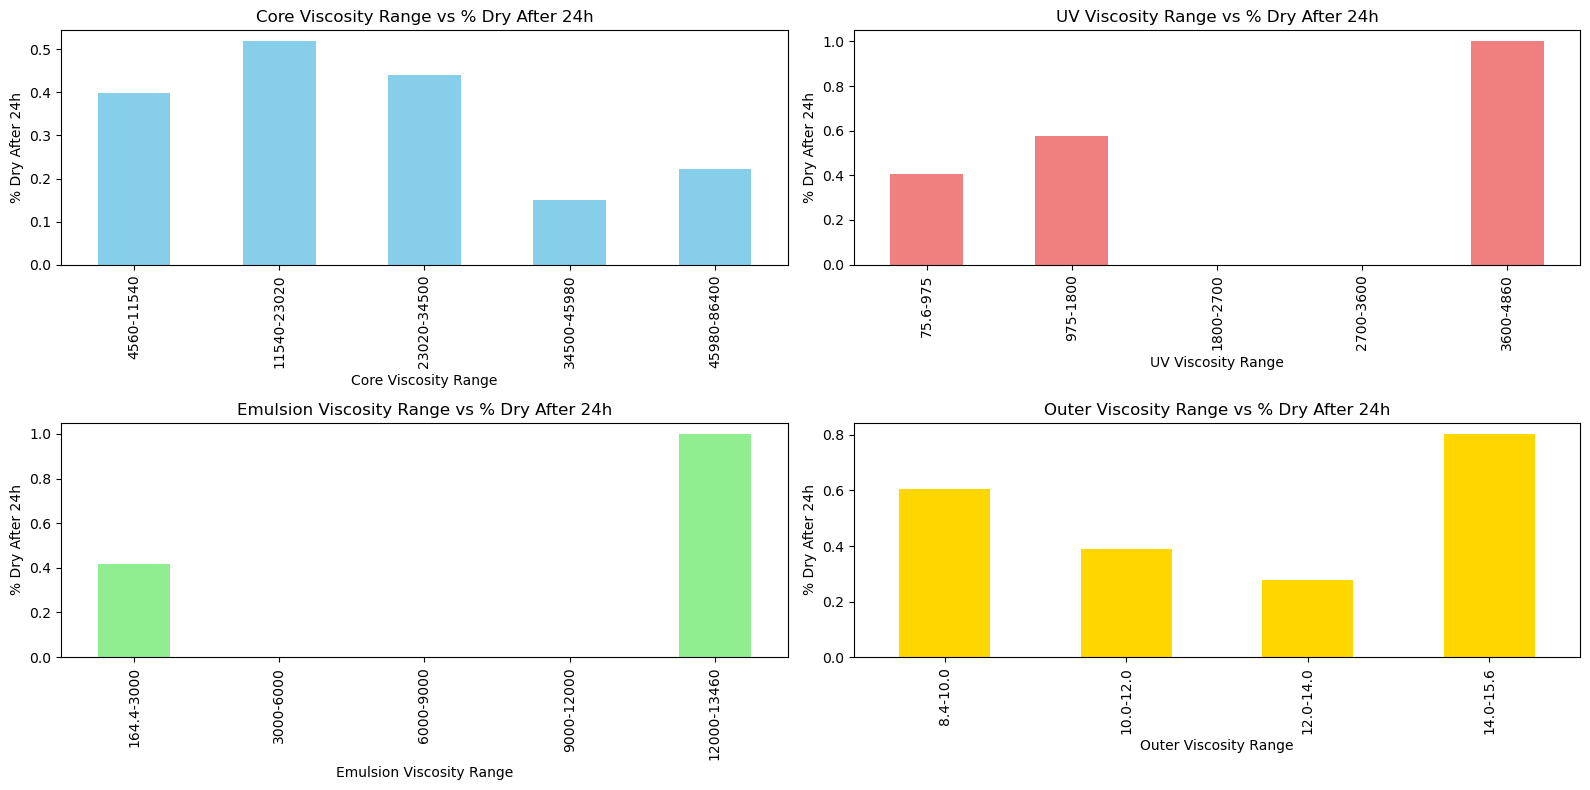

In [49]:
# Group by the viscosity ranges and calculate the average % dry after 24h and 2 days at 70% humidity for each group
dry_24h = data.groupby('Core Viscosity Range')['% dry after 24h in incubator'].mean()

dry_24h_uv = data.groupby('UV Viscosity Range')['% dry after 24h in incubator'].mean()

dry_24h_emulsion = data.groupby('Emulsion Viscosity Range')['% dry after 24h in incubator'].mean()

dry_24h_outer = data.groupby('Outer Viscosity Range')['% dry after 24h in incubator'].mean()

# Plotting the results in bar charts

plt.figure(figsize=(16, 8))

# Bar plot for Core Viscosity Range vs % Dry After 24h
plt.subplot(2, 2, 1)
dry_24h.plot(kind='bar', color='skyblue')
plt.title('Core Viscosity Range vs % Dry After 24h')
plt.xlabel('Core Viscosity Range')
plt.ylabel('% Dry After 24h')

# Bar plot for UV Viscosity Range vs % Dry After 24h
plt.subplot(2, 2, 2)
dry_24h_uv.plot(kind='bar', color='lightcoral')
plt.title('UV Viscosity Range vs % Dry After 24h')
plt.xlabel('UV Viscosity Range')
plt.ylabel('% Dry After 24h')

# Bar plot for Emulsion Viscosity Range vs % Dry After 24h
plt.subplot(2, 2, 3)
dry_24h_emulsion.plot(kind='bar', color='lightgreen')
plt.title('Emulsion Viscosity Range vs % Dry After 24h')
plt.xlabel('Emulsion Viscosity Range')
plt.ylabel('% Dry After 24h')

# Bar plot for Outer Viscosity Range vs % Dry After 24h
plt.subplot(2, 2, 4)
dry_24h_outer.plot(kind='bar', color='gold')
plt.title('Outer Viscosity Range vs % Dry After 24h')
plt.xlabel('Outer Viscosity Range')
plt.ylabel('% Dry After 24h')

# Show the plots
plt.tight_layout()
plt.show()

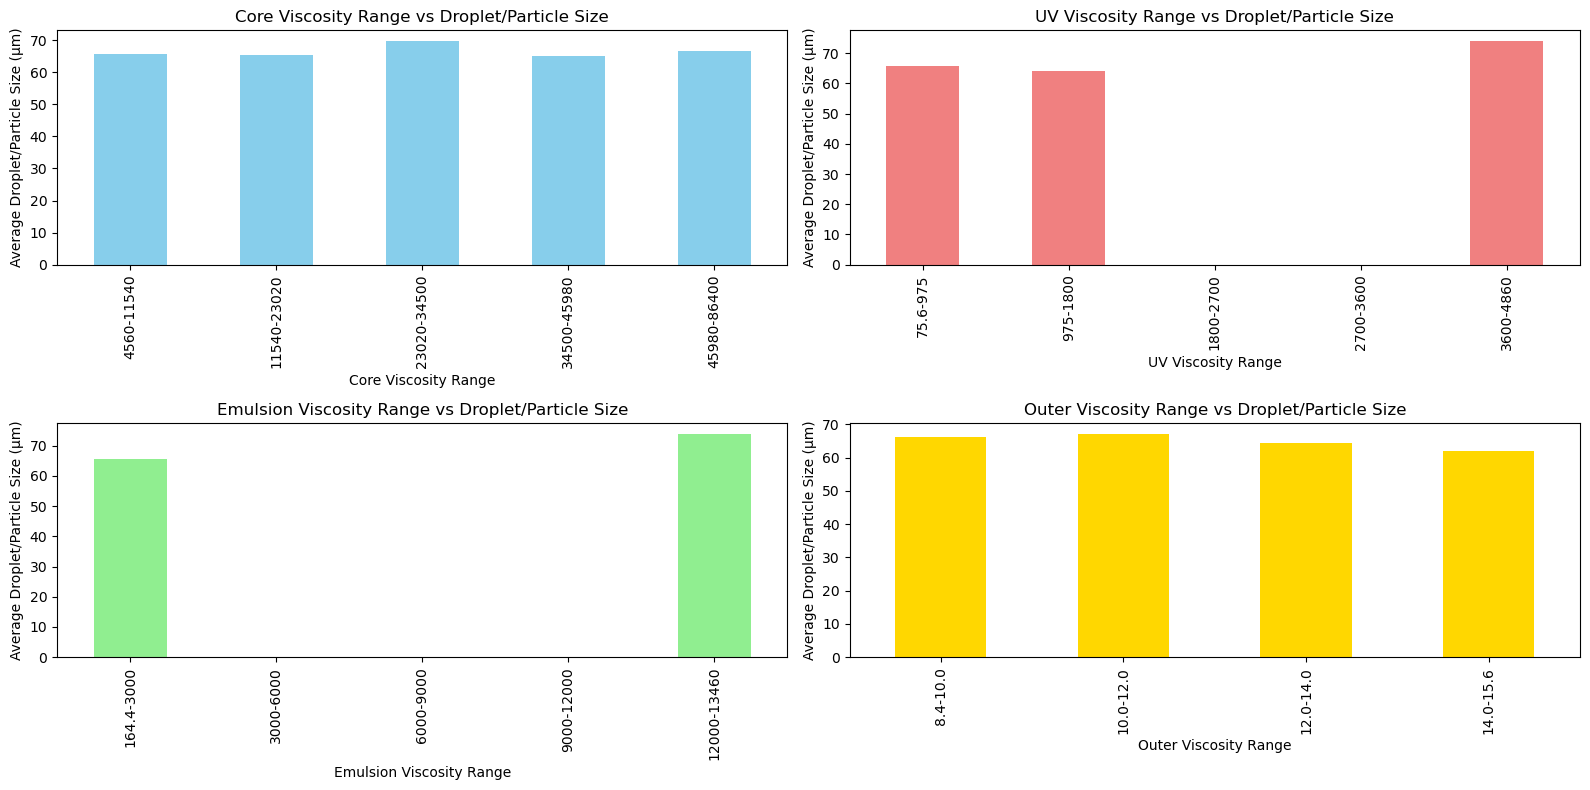

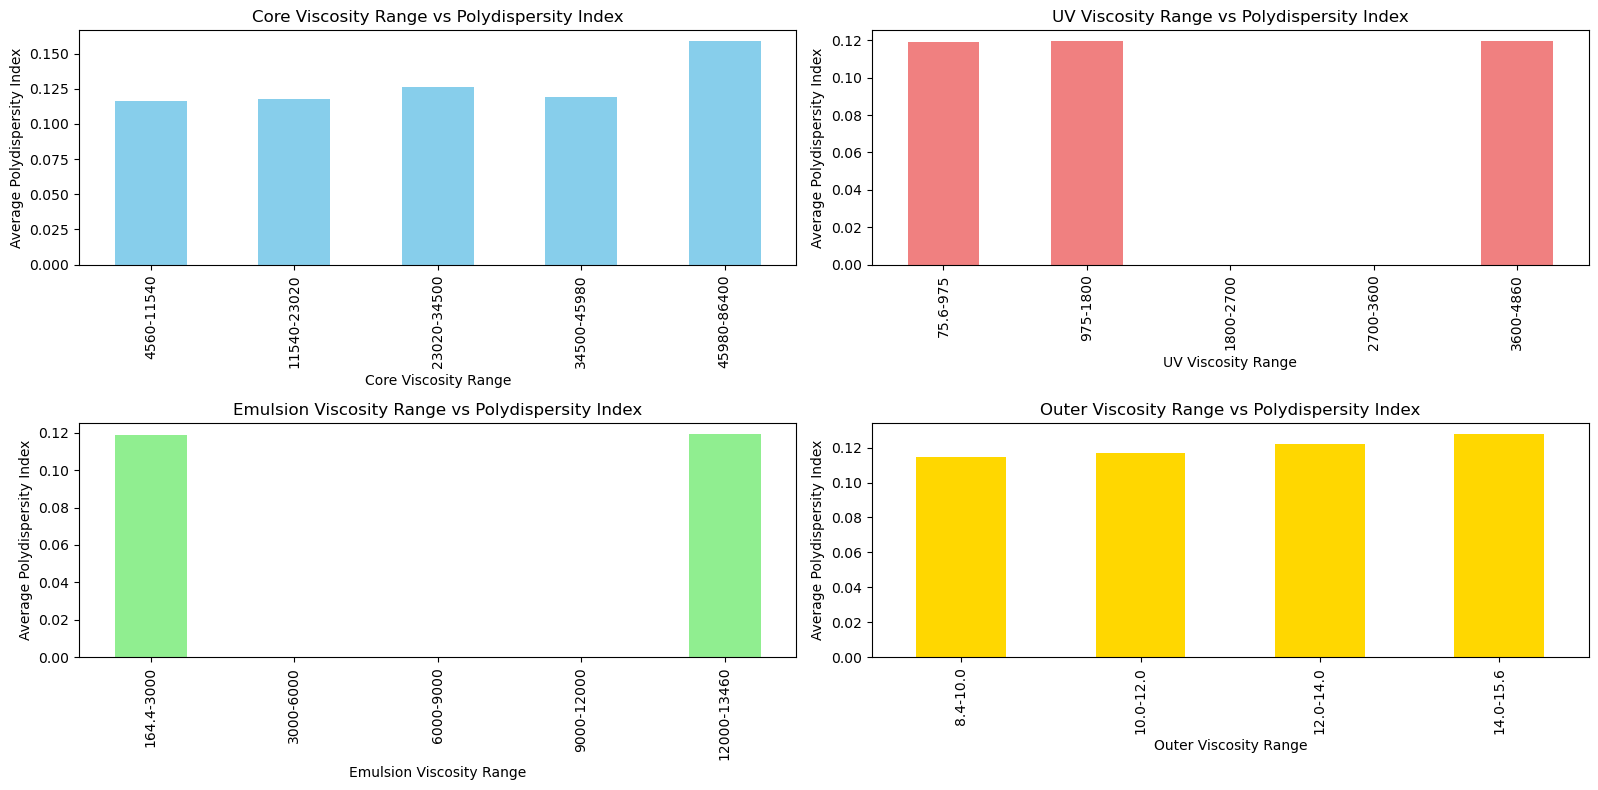

In [50]:
# Group by the viscosity ranges and calculate the average Droplet/Particle Size and Polydispersity Index for each group
droplet_size_core = data.groupby('Core Viscosity Range')['Droplet/particle size (µm)'].mean()
pdi_core = data.groupby('Core Viscosity Range')['Polydispersity Index'].mean()

droplet_size_uv = data.groupby('UV Viscosity Range')['Droplet/particle size (µm)'].mean()
pdi_uv = data.groupby('UV Viscosity Range')['Polydispersity Index'].mean()

droplet_size_emulsion = data.groupby('Emulsion Viscosity Range')['Droplet/particle size (µm)'].mean()
pdi_emulsion = data.groupby('Emulsion Viscosity Range')['Polydispersity Index'].mean()

droplet_size_outer = data.groupby('Outer Viscosity Range')['Droplet/particle size (µm)'].mean()
pdi_outer = data.groupby('Outer Viscosity Range')['Polydispersity Index'].mean()

# Plotting the results in bar charts for Droplet/Particle Size

plt.figure(figsize=(16, 8))

# Bar plot for Core Viscosity Range vs Droplet/Particle Size
plt.subplot(2, 2, 1)
droplet_size_core.plot(kind='bar', color='skyblue')
plt.title('Core Viscosity Range vs Droplet/Particle Size')
plt.xlabel('Core Viscosity Range')
plt.ylabel('Average Droplet/Particle Size (µm)')

# Bar plot for UV Viscosity Range vs Droplet/Particle Size
plt.subplot(2, 2, 2)
droplet_size_uv.plot(kind='bar', color='lightcoral')
plt.title('UV Viscosity Range vs Droplet/Particle Size')
plt.xlabel('UV Viscosity Range')
plt.ylabel('Average Droplet/Particle Size (µm)')

# Bar plot for Emulsion Viscosity Range vs Droplet/Particle Size
plt.subplot(2, 2, 3)
droplet_size_emulsion.plot(kind='bar', color='lightgreen')
plt.title('Emulsion Viscosity Range vs Droplet/Particle Size')
plt.xlabel('Emulsion Viscosity Range')
plt.ylabel('Average Droplet/Particle Size (µm)')

# Bar plot for Outer Viscosity Range vs Droplet/Particle Size
plt.subplot(2, 2, 4)
droplet_size_outer.plot(kind='bar', color='gold')
plt.title('Outer Viscosity Range vs Droplet/Particle Size')
plt.xlabel('Outer Viscosity Range')
plt.ylabel('Average Droplet/Particle Size (µm)')

# Show the plots
plt.tight_layout()
plt.show()

# Plotting the results in bar charts for Polydispersity Index

plt.figure(figsize=(16, 8))

# Bar plot for Core Viscosity Range vs Polydispersity Index
plt.subplot(2, 2, 1)
pdi_core.plot(kind='bar', color='skyblue')
plt.title('Core Viscosity Range vs Polydispersity Index')
plt.xlabel('Core Viscosity Range')
plt.ylabel('Average Polydispersity Index')

# Bar plot for UV Viscosity Range vs Polydispersity Index
plt.subplot(2, 2, 2)
pdi_uv.plot(kind='bar', color='lightcoral')
plt.title('UV Viscosity Range vs Polydispersity Index')
plt.xlabel('UV Viscosity Range')
plt.ylabel('Average Polydispersity Index')

# Bar plot for Emulsion Viscosity Range vs Polydispersity Index
plt.subplot(2, 2, 3)
pdi_emulsion.plot(kind='bar', color='lightgreen')
plt.title('Emulsion Viscosity Range vs Polydispersity Index')
plt.xlabel('Emulsion Viscosity Range')
plt.ylabel('Average Polydispersity Index')

# Bar plot for Outer Viscosity Range vs Polydispersity Index
plt.subplot(2, 2, 4)
pdi_outer.plot(kind='bar', color='gold')
plt.title('Outer Viscosity Range vs Polydispersity Index')
plt.xlabel('Outer Viscosity Range')
plt.ylabel('Average Polydispersity Index')

# Show the plots
plt.tight_layout()
plt.show()

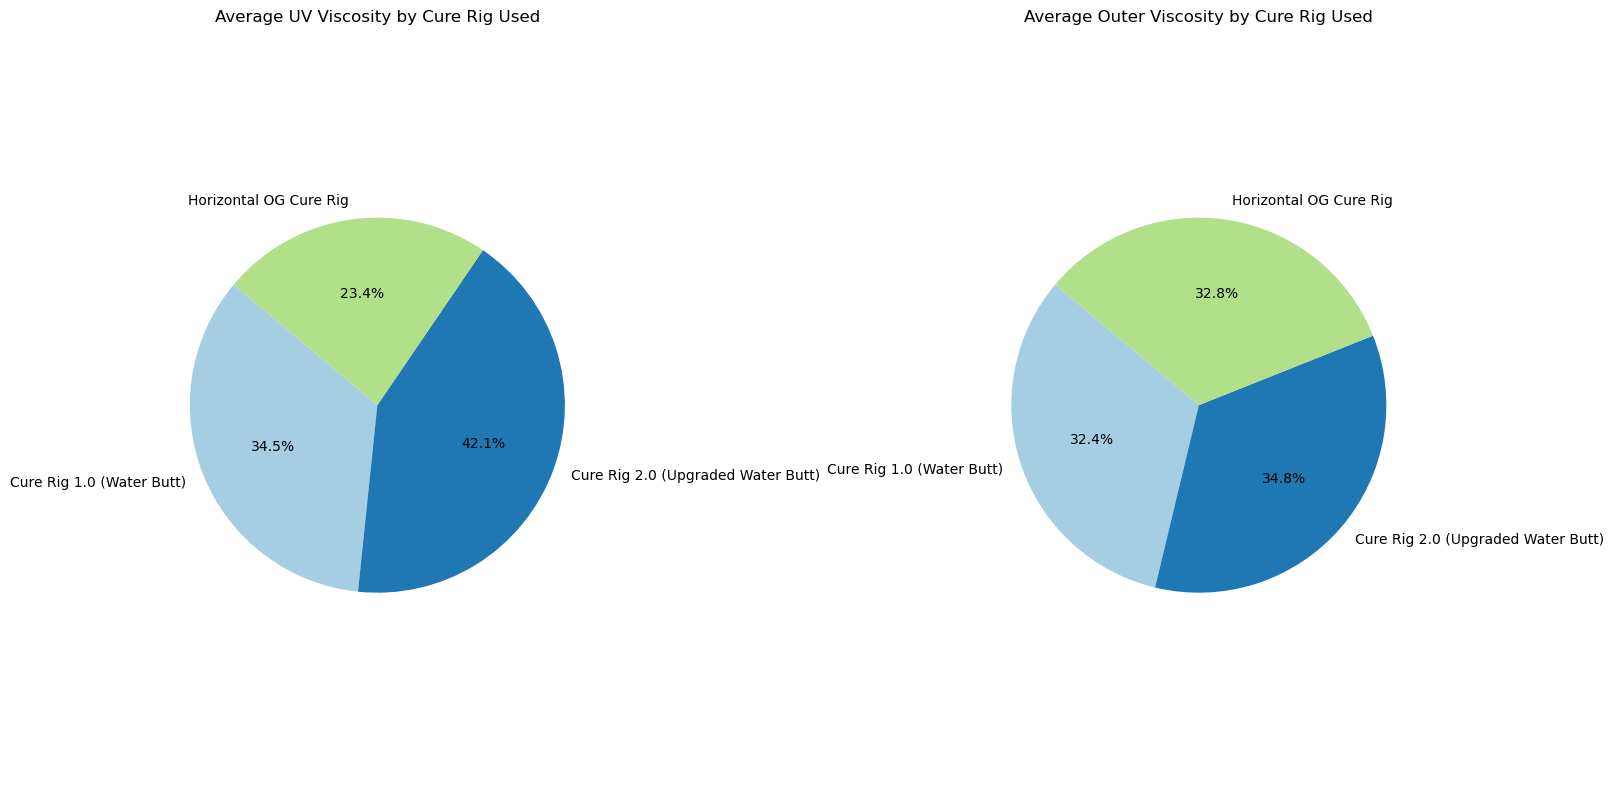

In [54]:
# Group by 'Cure Rig Used' and calculate the average UV Viscosity and Outer Viscosity for each group
cure_rig_uv_viscosity = data.groupby('Cure Rig Used')['UV viscosity (cP)'].mean()
cure_rig_outer_viscosity = data.groupby('Cure Rig Used')['Outer viscosity (cP)'].mean()

# Create side-by-side pie charts
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for average UV Viscosity by Cure Rig Used
ax[0].pie(cure_rig_uv_viscosity, labels=cure_rig_uv_viscosity.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax[0].set_title('Average UV Viscosity by Cure Rig Used')
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Pie chart for average Outer Viscosity by Cure Rig Used
ax[1].pie(cure_rig_outer_viscosity, labels=cure_rig_outer_viscosity.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax[1].set_title('Average Outer Viscosity by Cure Rig Used')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.tight_layout()
plt.show()

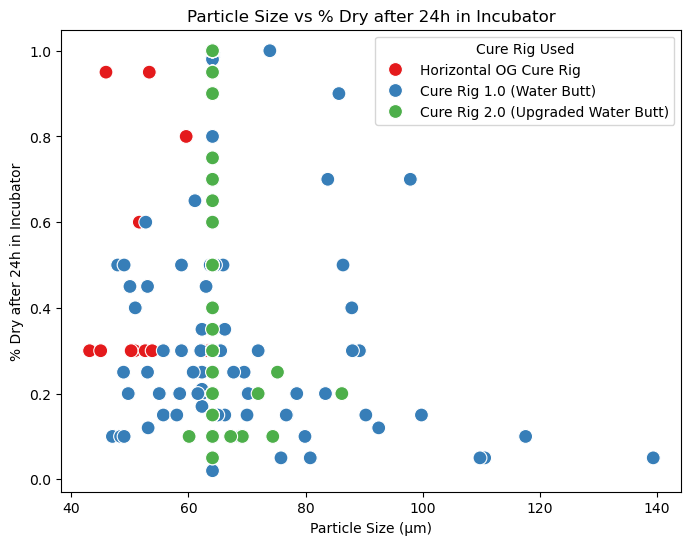

In [62]:
# Scatter plot for Particle Size vs % Dry with Cure Rig Used as legend
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Droplet/particle size (µm)', y='% dry after 24h in incubator', hue='Cure Rig Used', palette='Set1', s=100)
plt.title('Particle Size vs % Dry after 24h in Incubator')
plt.xlabel('Particle Size (µm)')
plt.ylabel('% Dry after 24h in Incubator')
plt.grid(False)
plt.legend(title='Cure Rig Used', loc='upper right')
plt.show()

# Model Training and Evaluation

In [ ]:
def training(X,y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    # Model Training
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Prediction
    y_pred = model.predict(X_test)
    
    # Evaluation Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Print Evaluation Results
    print("Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.5f}")
    print(f"Mean Squared Error (MSE): {mse:.5f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")
    print(f"R² Score: {r2:.5f}")
    
    # 9. Visualizations
    
    # Scatter plot - Actual vs Predicted
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel('Actual Transmission Window')
    plt.ylabel('Predicted Transmission Window')
    plt.title('Actual vs Predicted Transmission Window')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') # Line for perfect prediction
    plt.grid(False)
    plt.show()
    
    # Residual plot - Errors
    residuals = y_test - y_pred
    plt.figure(figsize=(8,6))
    sns.histplot(residuals, kde=True)
    plt.title('Residuals Distribution')
    plt.xlabel('Prediction Errors')
    plt.grid(False)
    plt.show()
    
    # Feature Importance Plot
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10,6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances)
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.grid(False)
    plt.show()

## Droplet Particle Size as first output metrics

In [19]:
X_particle_size = data[[
    'Core Viscosity (cP)', 
    'UV viscosity (cP)', 
    'Emulsion viscosity (cP)', 
    'Dispersed Flow Rate (mL/min)', 
    'Continuous Flow Rate (mL/min)', 
    'Curing Energy (kJ g-1)'
]]

y_particle_size = data['Droplet/particle size (µm)']

Evaluation Metrics:
Mean Absolute Error (MAE): 4.77367
Mean Squared Error (MSE): 72.99481
Root Mean Squared Error (RMSE): 8.54370
R² Score: 0.07591


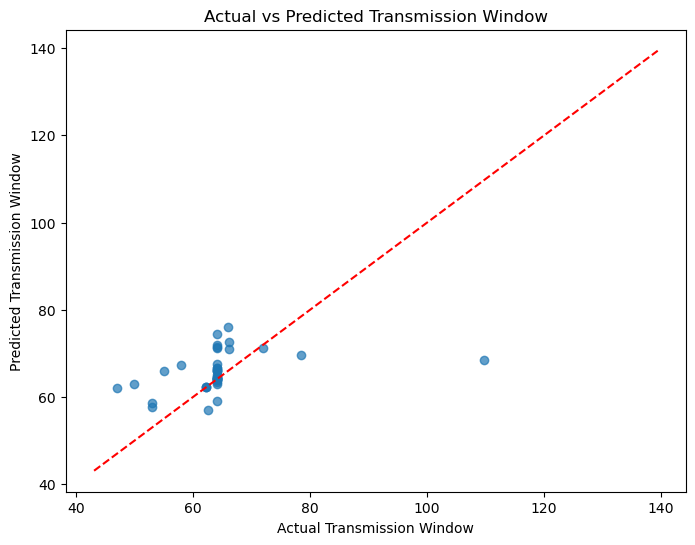

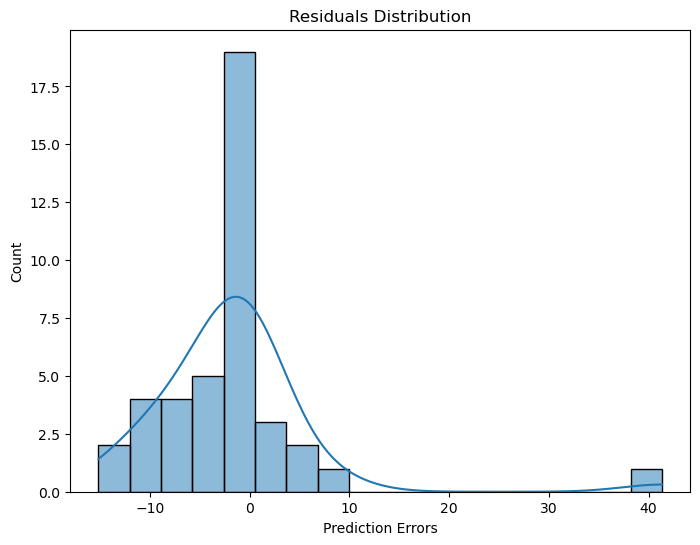

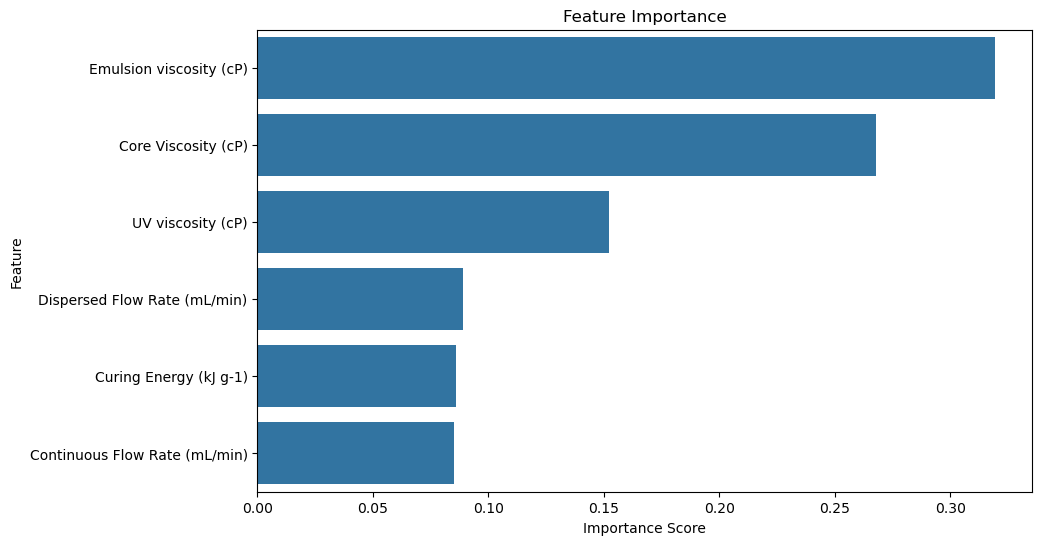

In [20]:
training(X_particle_size, y_particle_size)

## Dry Percentage

In [21]:
X_dry_percentage = data[[
    'Curing Energy (kJ g-1)', 
    'Flow Rate Ratio', 
    'Emulsion viscosity (cP)', 
    'Droplet/particle size (µm)', 
    'UV viscosity (cP)',
    'Core Viscosity (cP)'
]]

y_dry_percentage = data['% dry after 24h in incubator']

Evaluation Metrics:
Mean Absolute Error (MAE): 0.13441
Mean Squared Error (MSE): 0.03583
Root Mean Squared Error (RMSE): 0.18930
R² Score: 0.59371


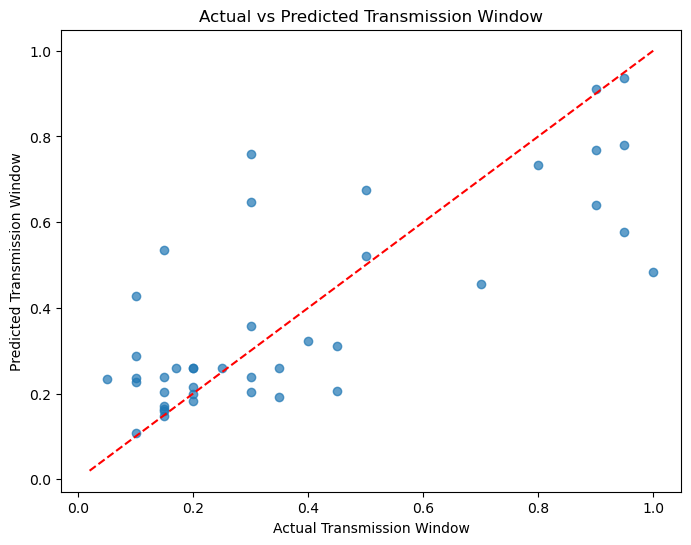

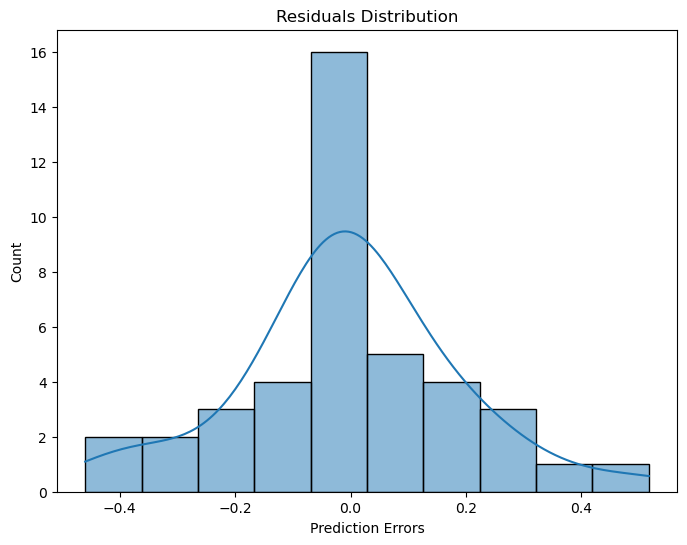

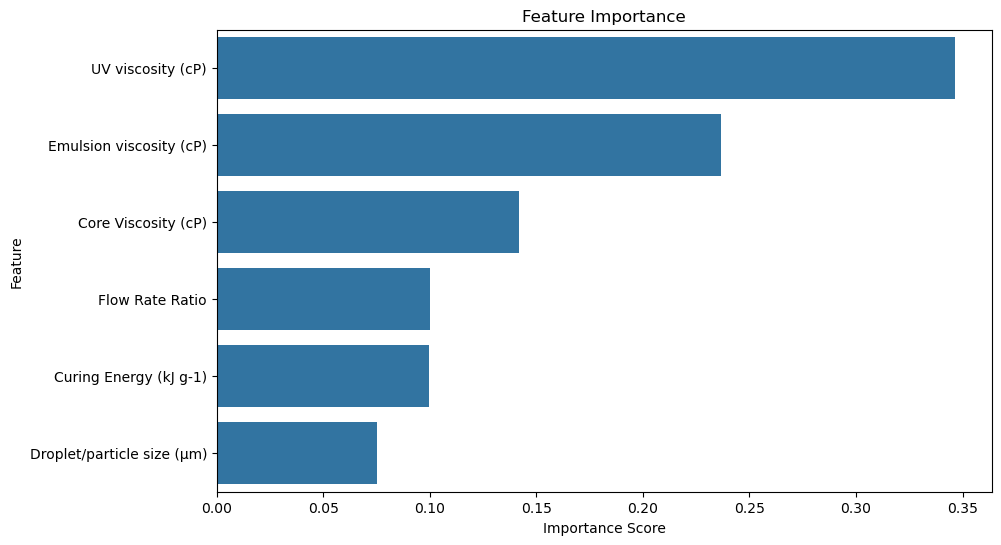

In [22]:
training(X_dry_percentage,y_dry_percentage )

## Transmission Window
**The ability of the particle to transmit light. A higher transmission window means better performance, particularly for optical properties like reflection or color change.**

Evaluation Metrics:
Mean Absolute Error (MAE): 0.00179
Mean Squared Error (MSE): 0.00002
Root Mean Squared Error (RMSE): 0.00402
R² Score: -1.14494


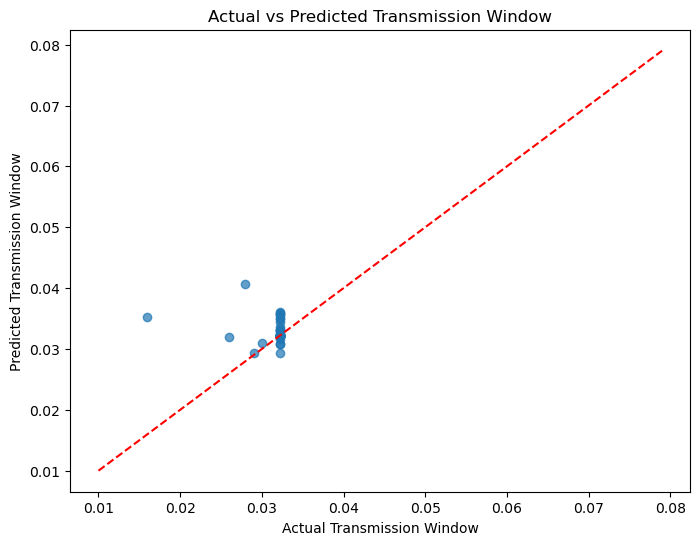

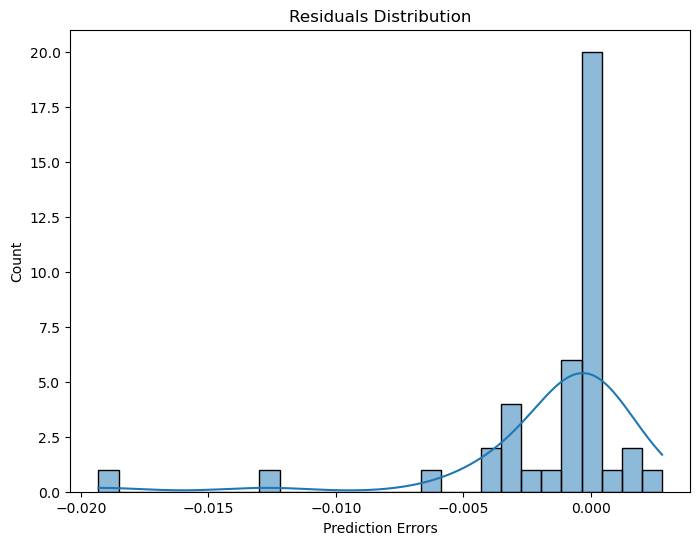

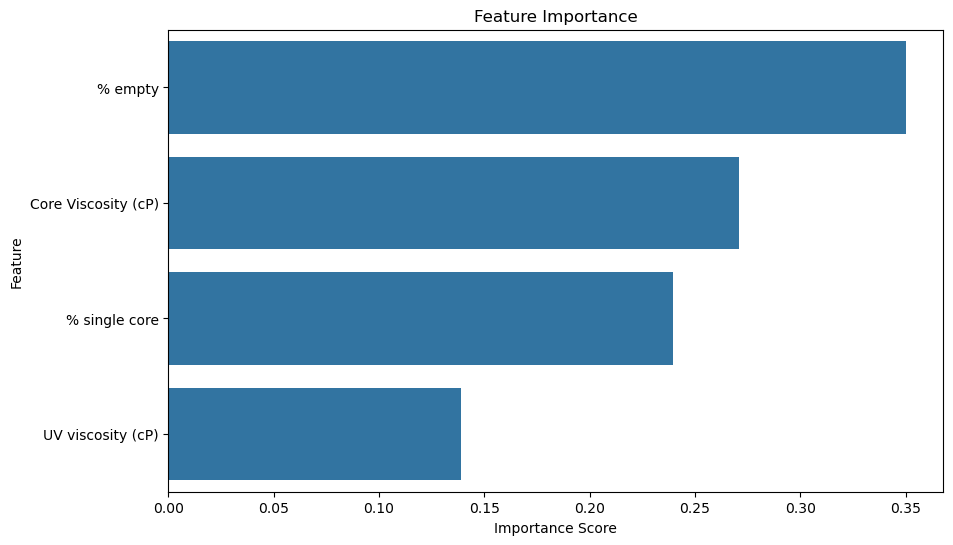

In [23]:
X_transmission_window = data[[
    '% single core', 
    'UV viscosity (cP)', 
    'Core Viscosity (cP)',
    '% empty'
]]

y_transmission_window = data['Transmission window']
training(X_transmission_window,y_transmission_window)

## % Empty (Empty Particles)

Evaluation Metrics:
Mean Absolute Error (MAE): 0.01508
Mean Squared Error (MSE): 0.00118
Root Mean Squared Error (RMSE): 0.03434
R² Score: 0.13325


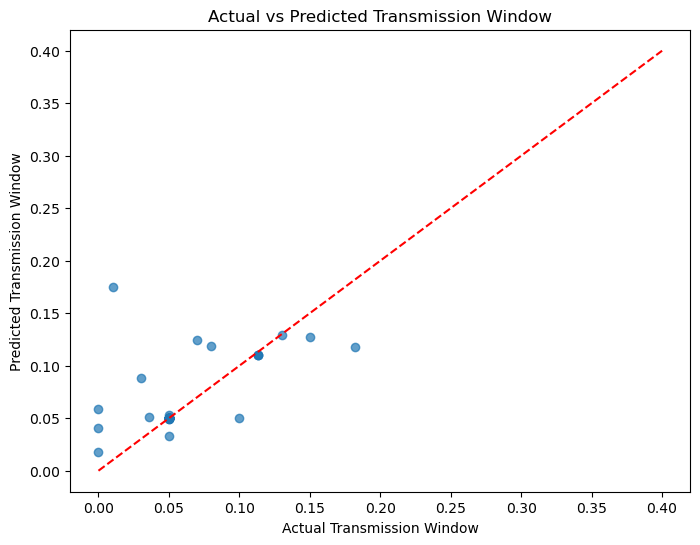

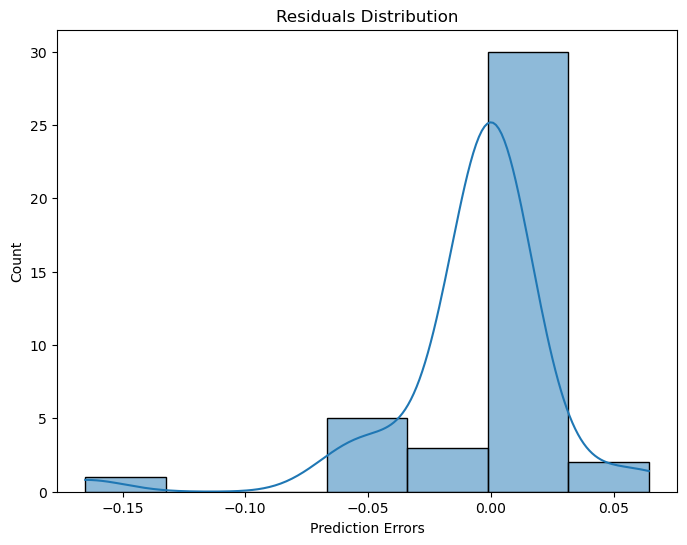

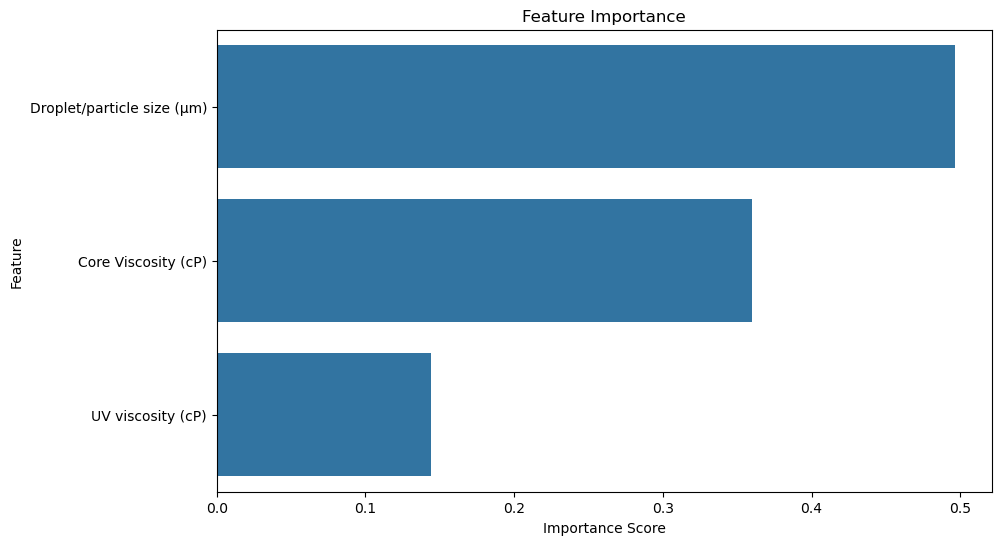

In [30]:
X_empty_particles = data[[
    'UV viscosity (cP)', 
    'Core Viscosity (cP)',
    'Droplet/particle size (µm)'
]]

y_empty_particles = data['% empty']
training(X_empty_particles,y_empty_particles)

## Polydispersity

Evaluation Metrics:
Mean Absolute Error (MAE): 0.01137
Mean Squared Error (MSE): 0.00068
Root Mean Squared Error (RMSE): 0.02598
R² Score: -0.18214


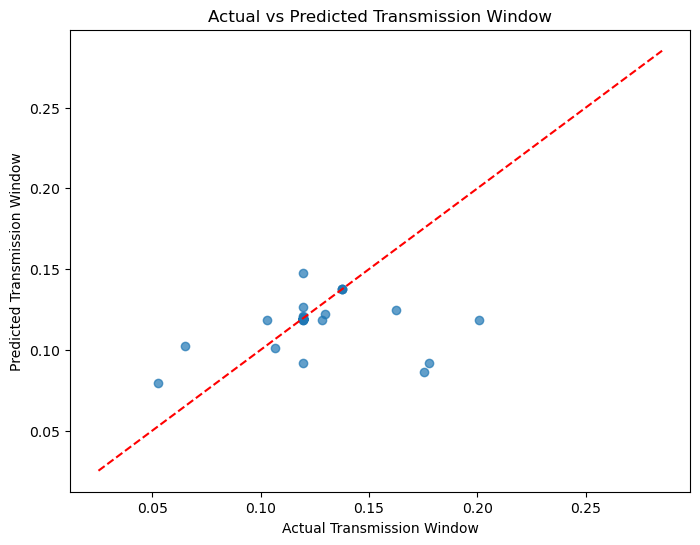

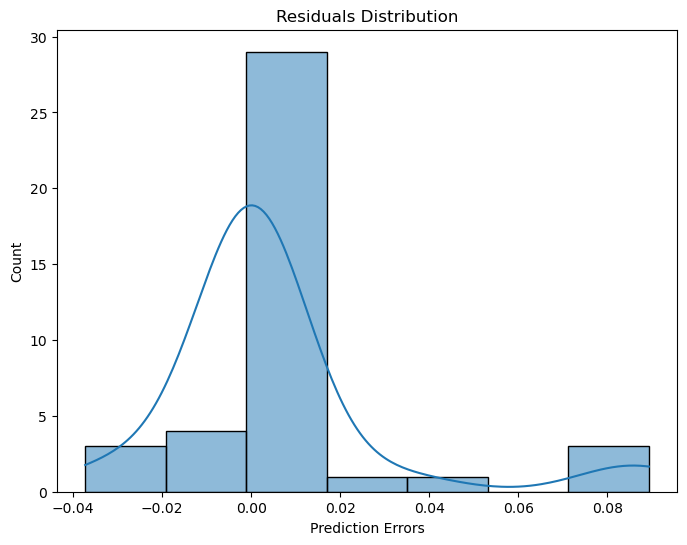

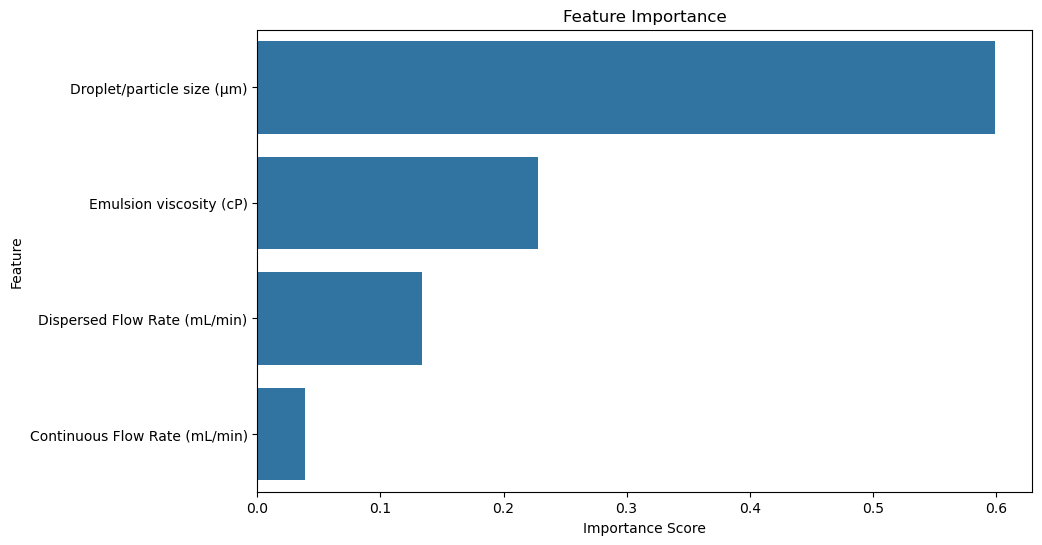

In [28]:
X_polydispersity = data[[
    'Droplet/particle size (µm)', 
    'Emulsion viscosity (cP)', 
    'Dispersed Flow Rate (mL/min)', 
    'Continuous Flow Rate (mL/min)'
]]

y_polydispersity = data['Polydispersity Index']
training(X_polydispersity,y_polydispersity)